In [ ]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
from tqdm import tqdm
import numpy as np
from PIL import Image
from csbdeep.utils import normalize
import tifffile as tiff

sys.path.append(str(Path("..").resolve()))
from src import *

# Generate Trainset
The trainset is made of couples of `noisy`-`cleaned` images.

- The `noisy` image is the noisy input. Or maybe an averaged version with a small sliding window?
- The `clean` image is the one denoised with DeepCAD-RT or the like.

In [32]:
mot_cor_np = tiff.imread(str(DATASETS["oabf_astro"] / "x.tiff"), key=range(0, 10_000, 8))
deepcad_np = tiff.imread(str(DATASETS["oabf_astro"] / "y.tiff"), key=range(0, 10_000, 8))

## 1. Preview samples

In [33]:
mot_cor=Recording(mot_cor_np)
deepcad=Recording(deepcad_np)

In [35]:
FRAME=100
AVG=8

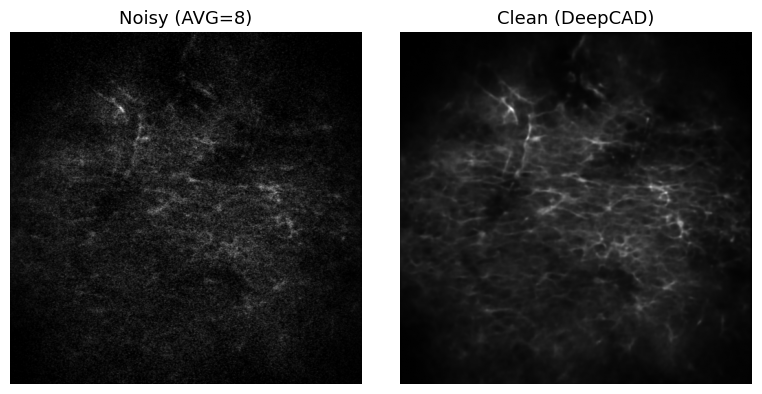

In [36]:
imshow(
    {
        f"Noisy (AVG={AVG})": mot_cor.avg(FRAME, AVG),
        "Clean (DeepCAD)": deepcad[FRAME].np,
    },
    cmap="grey",
)

## 2. Generate samples

In [37]:
noisy_dir = Path("dataset/noisy")
cond_dir = Path("dataset/cond")

In [38]:
# >1m
for i in tqdm(range(mot_cor.frames)):
    noisy=mot_cor.avg(i, AVG)*255
    noisy=np.clip(normalize(noisy, 0.1, 99.9), max=1)*255
    cond=np.clip(normalize(deepcad[i].np, 0.1, 99.9), max=1)*255

    Image.fromarray (noisy).convert("L").save(noisy_dir / f"astro_{i}.png")
    Image.fromarray(cond).convert("L").save(cond_dir / f"astro_{i}.png")

100%|██████████| 1250/1250 [01:25<00:00, 14.68it/s]
